# Dynamic pricing

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Importing the data
main=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/df_1.csv", index_col=0)
backup=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/df_1.csv", index_col=0)

In [ ]:
df=main

df.head(6)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,adjusted_ride_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,266.710528
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,245.653817
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,424.478684
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,701.155452
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,1952.472427
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,544.414227


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   adjusted_ride_cost       1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 85.9+ KB


In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,adjusted_ride_cost
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,681.140017
std,23.701506,19.068346,29.313774,0.435781,49.16545,482.608198
min,20.000000,5.000000,0.000000,3.500000,10.00000,32.354313
25%,40.000000,11.000000,25.000000,3.870000,59.75000,340.636194
50%,60.000000,22.000000,51.000000,4.270000,102.00000,583.988691
75%,81.000000,38.000000,75.000000,4.632500,143.00000,889.630274
max,100.000000,89.000000,100.000000,5.000000,180.00000,3321.900511


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('adjusted_ride_cost',axis=1)
y = df['adjusted_ride_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
df['Customer_Loyalty_Status'].unique()

array(['Silver', 'Regular', 'Gold'], dtype=object)

In [ ]:
df['Location_Category'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [ ]:
df['Time_of_Booking'].unique()

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [ ]:
df['Vehicle_Type'].unique()

array(['Premium', 'Economy'], dtype=object)

## Pipeline (Encoding)

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_features = ['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']
ordinal_features = ['Customer_Loyalty_Status','Vehicle_Type']
nominal_features = ['Location_Category' ,'Time_of_Booking']

In [ ]:
numeric_transformer = StandardScaler()


In [ ]:
encoder_loy = OrdinalEncoder(categories = [['Regular', 'Silver', 'Gold']])
encoder_veh = OrdinalEncoder(categories = [['Economy', 'Premium']])
nominal_transformer = OneHotEncoder()


In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                        ('num',numeric_transformer,numeric_features),
                                        ('loyl',encoder_loy,['Customer_Loyalty_Status']),
                                        ('vehi',encoder_veh, ['Vehicle_Type']),
                                        ('nomi',nominal_transformer,nominal_features)
                                             ])

# Regression Trees

## Decision Tree

## Creating the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',DecisionTreeRegressor(random_state=42)) ])

In [ ]:
DT_model = pipeline.fit(X_train, y_train)

In [ ]:
DT_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

## Model accuracy without tuning

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Decision Tree w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

Decision Tree w/o tuning: 

R2 Score (Test): 0.7030
R2 Score (Train): 1.0000
RMSE (Test): 253.0858
RMSE (Train):0.0000




## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'regressor__max_depth' : list(range(3,15,3)),
    'regressor__min_samples_split' : list(range(10,100,25)),
    'regressor__min_samples_leaf' : list(range(5,50,10))

}

In [ ]:
DT_grid = GridSearchCV(estimator= pipeline, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Fitting  GridSearchCV Object
DT_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Number_of_Riders',
                                                                          'Number_of_Drivers',
                                                                          'Number_of_Past_Rides',
                                                                          'Average_Ratings',
                                                                          'Expected_Ride_Duration']),
                                                                        ('loyl',
                                                                         OrdinalEncoder(categories=[['Regular',
                                                                                                     'Silver',
                                                                                                     'Gold']]),
                                                                         ['Customer_Loyalty_Status']),
                                                                        ('vehi',
                                                                         OrdinalEncoder(categories=[['Economy',
                                                                                                     'Premium']]),
                                                                         ['Vehicle_Type']),
                                                                        ('nomi',
                                                                         OneHotEncoder(),
                                                                         ['Location_Category',
                                                                          'Time_of_Booking'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [3, 6, 9, 12],
                         'regressor__min_samples_leaf': [5, 15, 25, 35, 45],
                         'regressor__min_samples_split': [10, 35, 60, 85]},
             verbose=1)

In [ ]:
# Get the best parameters and model from the grid search
best_params = DT_grid.best_params_
best_model = DT_grid.best_estimator_



# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'regressor__max_depth': 6, 'regressor__min_samples_leaf': 15, 'regressor__min_samples_split': 10}


In [ ]:

# Predict on the test data using the best model
y_pred_train = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Decision Trees with tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


Decision Trees with tuning: 

R2 Score (Test): 0.7030
R2 Score (Train): 0.8311
RMSE (Test): 253.0858
RMSE (Train):200.0465




# Random Forest

## Creating the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',RandomForestRegressor(random_state=42)) ])

In [ ]:
RF_model = pipeline.fit(X_train, y_train)

In [ ]:
RF_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# model accuracy without tuning

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [ ]:
y_pred_test = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Random forest w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


Random forest w/o tuning: 

R2 Score (Test): 0.8761
R2 Score (Train): 0.9779
RMSE (Test): 163.4659
RMSE (Train):72.2979




## Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'regressor__n_estimators' : list(range(100,180,20)),
    'regressor__max_features' : ['auto','sqrt',0.7],
    'regressor__max_depth' : list(range(5,15,5)),
    'regressor__min_samples_split' : list(range(10,100,50)),
    'regressor__min_samples_leaf' : list(range(5,50,10))

}

In [ ]:
# @title
from sklearn.model_selection import GridSearchCV

params = {
    'regressor__n_estimators' : [25,50,100,125,150],
    'regressor__max_features' : ['auto','sqrt'],
    'regressor__max_depth' : [10,20,30],
    'regressor__min_samples_split' : [5, 10],
    'regressor__min_samples_leaf' : [5,10]

}

In [ ]:
RF_grid = GridSearchCV(estimator= pipeline, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [ ]:
# Fitting  GridSearchCV Object
RF_grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Number_of_Riders',
                                                                          'Number_of_Drivers',
                                                                          'Number_of_Past_Rides',
                                                                          'Average_Ratings',
                                                                          'Expected_Ride_Duration']),
                                                                        ('loyl',
                                                                         OrdinalEncoder(categories=[['Regular',
                                                                                                     'Silver',
                                                                                                     'Gold']]),
                                                                         ['Customer_Loyalty_Status']),
                                                                        ('vehi',
                                                                         OrdinalEncoder(categorie...
                                                                         OneHotEncoder(),
                                                                         ['Location_Category',
                                                                          'Time_of_Booking'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=5,
             param_grid={'regressor__max_depth': [5, 10],
                         'regressor__max_features': ['auto', 'sqrt', 0.7],
                         'regressor__min_samples_leaf': [5, 15, 25, 35, 45],
                         'regressor__min_samples_split': [10, 60],
                         'regressor__n_estimators': [100, 120, 140, 160]},
             verbose=1)

## best parameters

In [ ]:
# Get the best parameters and model from the grid search
best_params = RF_grid.best_params_
best_model = RF_grid.best_estimator_



# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 120}


### model performance after tuning

In [ ]:
# Predict on the test data using the best model
y_pred_train = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Random Forest with tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

Random Forest with tuning: 

R2 Score (Test): 0.8761
R2 Score (Train): 0.9251
RMSE (Test): 163.4659
RMSE (Train):133.2283




# Gradient Boosting - XGB

## Creating the model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',GradientBoostingRegressor(random_state=10)) ])

In [ ]:
XG_model = pipeline.fit(X_train, y_train)

In [ ]:
XG_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', GradientBoostingRegressor(random_state=10))])

# model accuracy without tuning

In [ ]:
y_pred_test = XG_model.predict(X_test)
y_pred_train = XG_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("XGB w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

XGB w/o tuning: 

R2 Score (Test): 0.8813
R2 Score (Train): 0.9432
RMSE (Test): 160.0257
RMSE (Train):116.0465




## tuning


In [ ]:

params = {
    'regressor__learning_rate' : [0.1,0.15],
    'regressor__n_estimators' : [100,150,250],
    'regressor__max_features' : ['sqrt',0.7],
    'regressor__max_depth' : [5,10],
    'regressor__min_samples_split' : [100,150,200],
    'regressor__min_samples_leaf' : [10,50,70]

}

In [ ]:
XG_grid = GridSearchCV(estimator= pipeline, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Fitting  GridSearchCV Object
XG_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Number_of_Riders',
                                                                          'Number_of_Drivers',
                                                                          'Number_of_Past_Rides',
                                                                          'Average_Ratings',
                                                                          'Expected_Ride_Duration']),
                                                                        ('loyl',
                                                                         OrdinalEncoder(categories=[['Regular',
                                                                                                     'Silver',
                                                                                                     'Gold']]),
                                                                         ['Customer_Loyalty_Status']),
                                                                        ('vehi',
                                                                         OrdinalEncoder(categorie...
                                                                         ['Location_Category',
                                                                          'Time_of_Booking'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=10))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1, 0.15],
                         'regressor__max_depth': [5, 10],
                         'regressor__max_features': ['sqrt', 0.7],
                         'regressor__min_samples_leaf': [10, 50, 70],
                         'regressor__min_samples_split': [100, 150, 200],
                         'regressor__n_estimators': [100, 150, 250]},
             verbose=1)

## best parameters

In [ ]:
# Get the best parameters and model from the grid search
best_params = XG_grid.best_params_
best_model = XG_grid.best_estimator_



# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'regressor__learning_rate': 0.15, 'regressor__max_depth': 5, 'regressor__max_features': 0.7, 'regressor__min_samples_leaf': 50, 'regressor__min_samples_split': 100, 'regressor__n_estimators': 250}


## model performance after tuning

In [ ]:

# Predict on the test data using the best model
y_pred_train = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("XGB with tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


XGB with tuning: 

R2 Score (Test): 0.8813
R2 Score (Train): 0.9759
RMSE (Test): 160.0257
RMSE (Train):75.6008




# SVM

## Creating the model

In [ ]:
from sklearn.svm import SVR
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',SVR()) ])

In [ ]:
SV_model = pipeline.fit(X_train, y_train)

In [ ]:
SV_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', SVR())])

# model accuracy without tuning

In [ ]:
y_pred_test = SV_model.predict(X_test)
y_pred_train = SV_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("SVM w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

SVM w/o tuning: 

R2 Score (Test): 0.0223
R2 Score (Train): 0.0270
RMSE (Test): 459.1890
RMSE (Train):480.1273




# Feature Importance using best model--> XGB

In [ ]:
final_estimator = XG_model.named_steps['regressor']

feature_importances = final_estimator.feature_importances_

# Get feature names
numeric_features = ['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']
ordinal_features = ['Customer_Loyalty_Status','Vehicle_Type']
nominal_features = ['Location_Category' ,'Time_of_Booking']

feature_names = numeric_features + ordinal_features + list(preprocessor.named_transformers_['nomi'].get_feature_names_out(nominal_features))

In [ ]:
feature_importances = final_estimator.feature_importances_
print(feature_importances)

In [ ]:
feature_importance_df = pd.DataFrame({
    "Variable": feature_names,
    "Importance": final_estimator.feature_importances_
})


FI_df_sorted_desc = feature_importance_df.sort_values(by="Importance", ascending=False)

FI_df_sorted_desc

,Variable,Importance
4,Expected_Ride_Duration,0.473209
1,Number_of_Drivers,0.345600
0,Number_of_Riders,0.165465
3,Average_Ratings,0.006041
6,Vehicle_Type,0.004386
2,Number_of_Past_Rides,0.003179
13,Time_of_Booking_Night,0.000629
8,Location_Category_Suburban,0.000536
10,Time_of_Booking_Afternoon,0.000370
7,Location_Category_Rural,0.000248


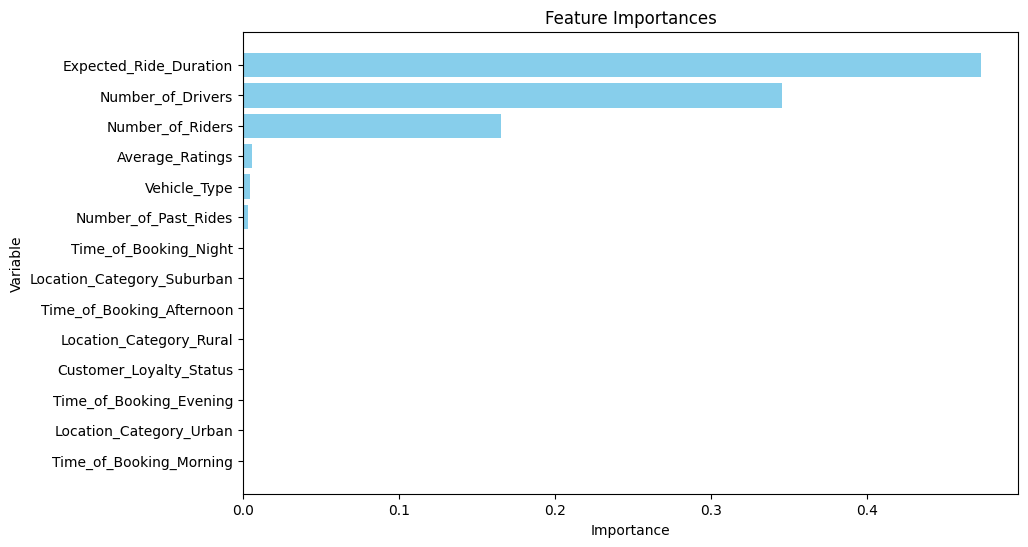

In [ ]:
import matplotlib.pyplot as plt

FI_df_sorted = feature_importance_df.sort_values(by="Importance", ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh("Variable", "Importance",data = FI_df_sorted, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Feature Importances')

plt.show()

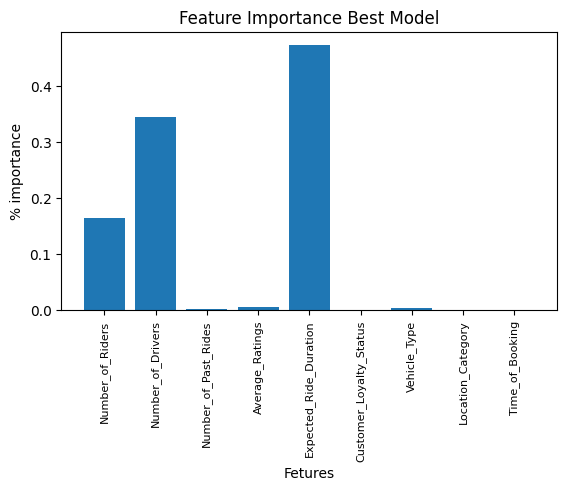

In [ ]:
column_headers=['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration','Customer_Loyalty_Status','Vehicle_Type','Location_Category','Time_of_Booking']
importance=[feature_importances[0],feature_importances[1],feature_importances[2],feature_importances[3],feature_importances[4],feature_importances[5],feature_importances[6],sum(feature_importances[7:10]),sum(feature_importances[10:14])]
important = pd.DataFrame({'name':column_headers, 'y':importance})
important
plt.subplots()
plt.subplots_adjust(bottom=0.3)
plt.bar(important.name, important.y )
plt.xticks(rotation='vertical',fontsize=8)
plt.xlabel('Fetures')
plt.ylabel('% importance')
plt.title('Feature Importance Best Model')
plt.show()

## Partial Dependencies

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 687 to 684
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         800 non-null    int64  
 1   Number_of_Drivers        800 non-null    int64  
 2   Location_Category        800 non-null    object 
 3   Customer_Loyalty_Status  800 non-null    object 
 4   Number_of_Past_Rides     800 non-null    int64  
 5   Average_Ratings          800 non-null    float64
 6   Time_of_Booking          800 non-null    object 
 7   Vehicle_Type             800 non-null    object 
 8   Expected_Ride_Duration   800 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.5+ KB


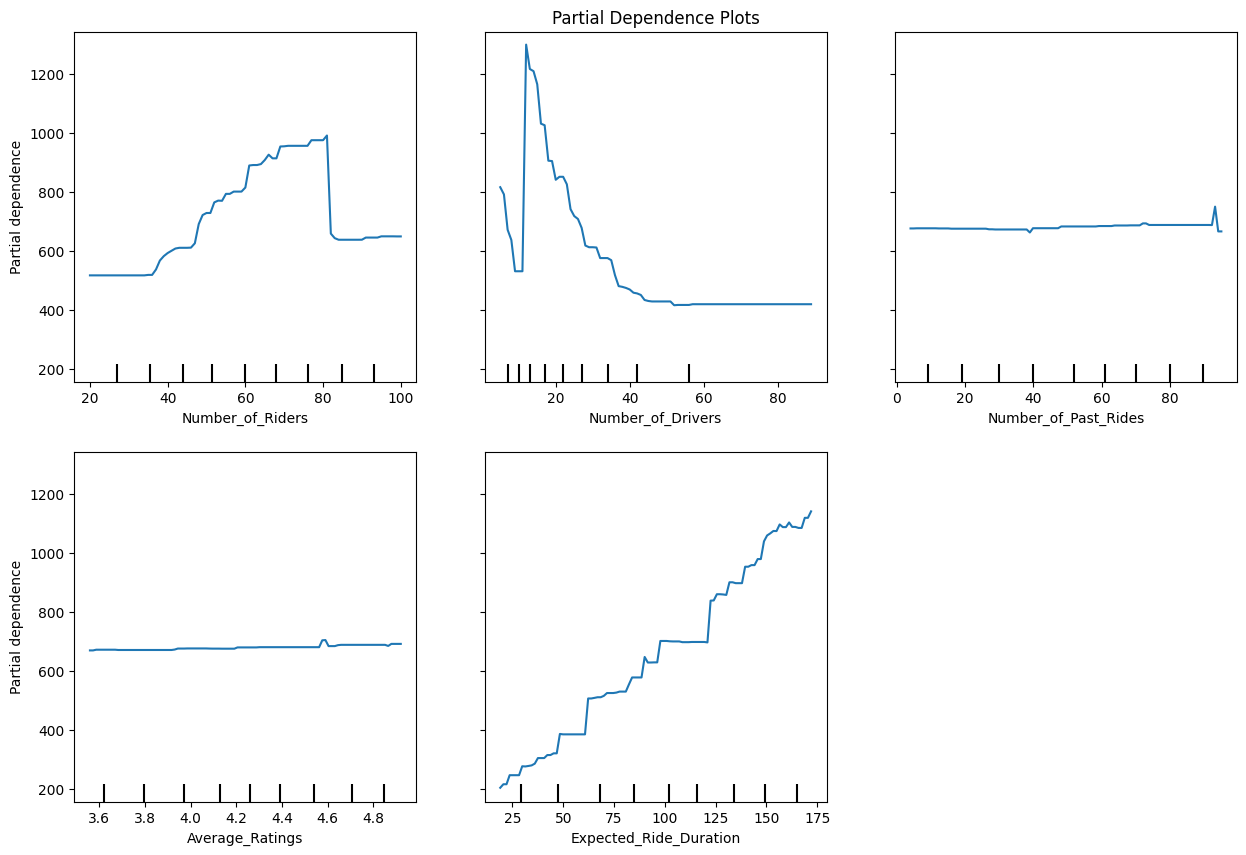

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=XG_model,
    X=X_train,
    features=[0, 1, 4, 5, 8],
    random_state=5,
    ax=ax,
    )
plt.show()

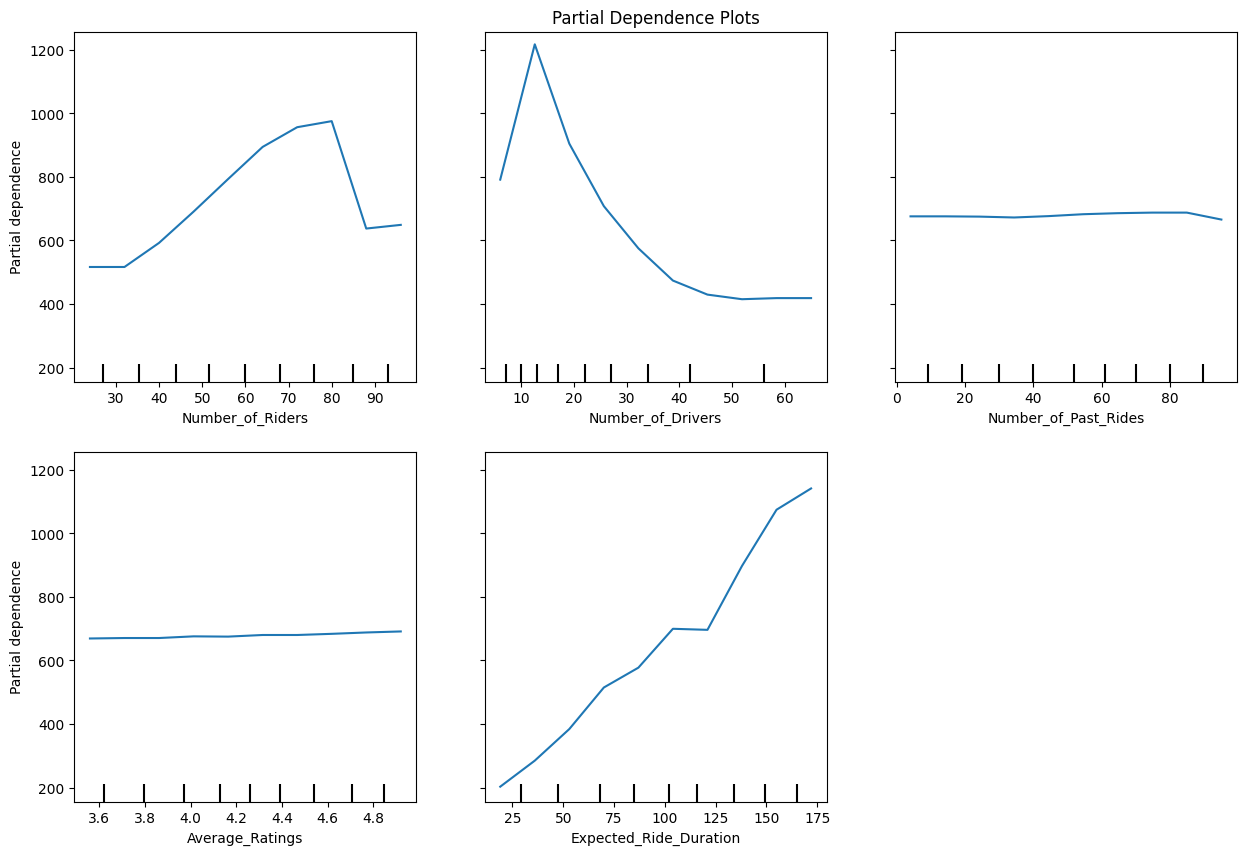

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=XG_model,
    X=X_train,
    features=[0, 1, 4, 5, 8],
    grid_resolution=10,
    kind="average",
    method='brute',
    random_state=5,
    ax=ax,
    )
plt.show()

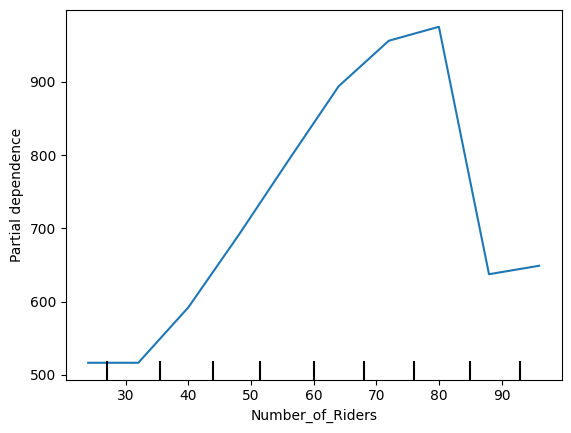

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features=[0]
PartialDependenceDisplay.from_estimator(XG_model, X_train, features, grid_resolution=10,kind="average",method='brute')

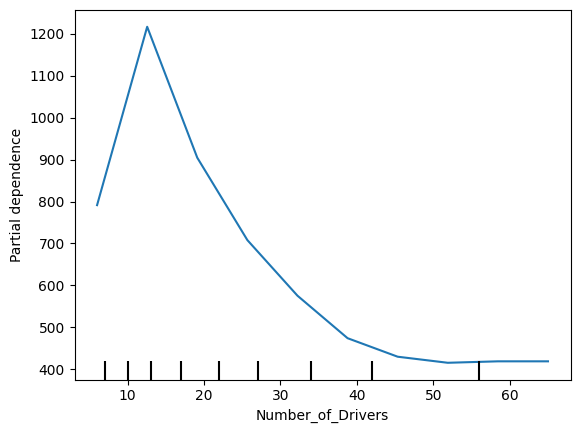

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features=[1]
PartialDependenceDisplay.from_estimator(XG_model, X_train, features, grid_resolution=10,kind="average",method='brute')

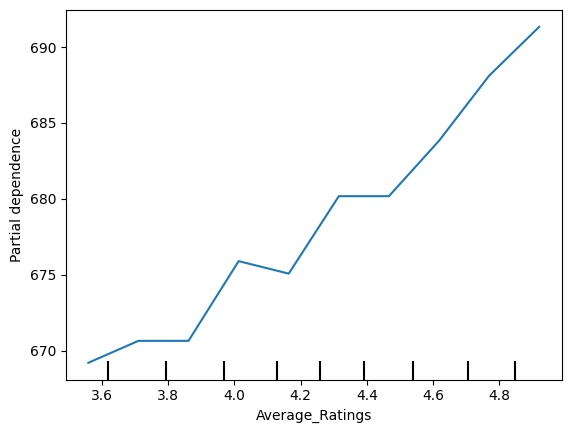

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features=[5]
PartialDependenceDisplay.from_estimator(XG_model, X_train, features, grid_resolution=10,kind="average",method='brute')

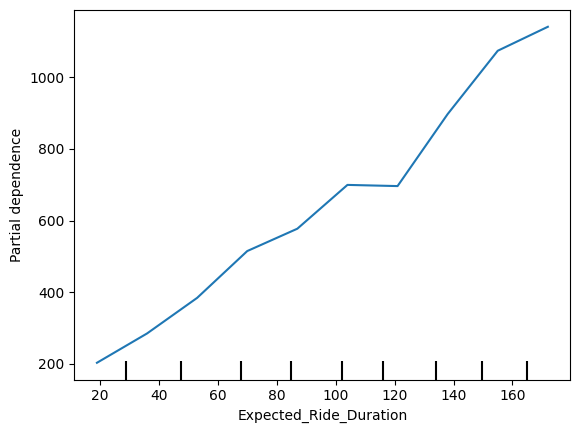

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features=[8
          ]
PartialDependenceDisplay.from_estimator(XG_model, X_train, features, grid_resolution=10,kind="average",method='brute')

# Neural Network

In [ ]:
#separating features and target for use in modelling
columns_to_drop = ['adjusted_ride_cost']
X = df.drop(columns=columns_to_drop, axis=1)

y = df['adjusted_ride_cost']

In [ ]:
# Splitting dataset to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)
X_val,X_test,y_val,y_test=train_test_split(X_test, y_test, test_size = .5, random_state=0)

In [ ]:
#creating train dataset
df_train=pd.concat([X_train, y_train], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_features = ['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']
ordinal_features = ['Customer_Loyalty_Status','Vehicle_Type']
nominal_features = ['Location_Category' ,'Time_of_Booking']

In [ ]:
encoder_loy = OrdinalEncoder(categories = [['Regular', 'Silver', 'Gold']])
encoder_veh = OrdinalEncoder(categories = [['Economy', 'Premium']])
nominal_transformer = OneHotEncoder()

In [ ]:
numeric_transformer = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                        ('num',numeric_transformer,numeric_features),
                                        ('loyl',encoder_loy,['Customer_Loyalty_Status']),
                                        ('vehi',encoder_veh, ['Vehicle_Type']),
                                        ('nomi',nominal_transformer,nominal_features)
                                             ])

In [ ]:
pipeline = Pipeline(steps = [('preprocessor', preprocessor) ])

In [ ]:
X_train_dummies_scaled = pipeline.fit_transform(X_train)
X_test_dummies_scaled = pipeline.fit_transform(X_test)
X_val_dummies_scaled = pipeline.fit_transform(X_val)

In [ ]:
print(X_train_dummies_scaled.shape)
print(X_test_dummies_scaled.shape)
print(X_val_dummies_scaled.shape)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[14]),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
history = model.fit(
    X_train_dummies_scaled, y_train,
    validation_data=(X_val_dummies_scaled, y_val),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
y_preds_train=model.predict(X_train_dummies_scaled)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, y_preds_train))
r2 = r2_score(y_train, y_preds_train)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


In [ ]:
y_preds_test=model.predict(X_test_dummies_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_preds_test))
r2 = r2_score(y_test, y_preds_test)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

In [ ]:
#In this instance we adddropout layers and batchnormalizations layers in the aim of reducing any overfitting that may occur
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[14]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
history = model.fit(
    X_train_dummies_scaled, y_train,
    validation_data=(X_val_dummies_scaled, y_val),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
y_preds_train=model.predict(X_train_dummies_scaled)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, y_preds_train))
r2 = r2_score(y_train, y_preds_train)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


In [ ]:
y_preds_test=model.predict(X_test_dummies_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_preds_test))
r2 = r2_score(y_test, y_preds_test)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
